In [1]:
import sys
sys.path.append('./_backend/')

import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
X = pd.read_csv('./../../../data_source/to_analysis/anomaly_filtered_concat.csv', index_col=0)
X.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxis,original_shape_Sphericity,...,PET_original_ngtdm_Complexity_128bins,PET_original_ngtdm_Contrast_32bins,PET_original_ngtdm_Contrast_64bins,PET_original_ngtdm_Contrast_128bins,PET_original_ngtdm_Strength_32bins,PET_original_ngtdm_Strength_64bins,PET_original_ngtdm_Strength_128bins,PETparam_SUVpeak,PETparam_MTV,PETparam_TLG
patient,,,,,,,,,,,,,,,,,,,,,
2,0.738882,0.723925,27.060529,37.380273,41.976184,44.598206,42.720019,45.617979,27.619612,0.661532,...,35043.624331,0.087280,0.162078,0.321302,4.795040,20.583636,82.226867,21.616549,7.384,124.870726
4,0.796900,0.629917,19.845151,31.504408,38.587563,35.468296,29.410882,38.704005,25.105855,0.701721,...,14564.029341,0.063470,0.112029,0.211571,4.960538,21.947247,92.427131,15.296275,3.406,41.554406
5,0.601166,0.535182,22.513266,42.066543,46.065171,43.011626,32.015621,46.454279,25.288987,0.758659,...,10319.058348,0.050778,0.090780,0.173466,1.955137,8.605178,35.576274,14.473272,7.934,86.228420
8,0.784593,0.414263,30.264199,73.055482,74.148500,80.956779,65.764732,83.438600,57.318801,0.519989,...,5608.554961,0.023681,0.037293,0.064838,0.407563,2.031182,9.261979,10.510859,26.926,205.413389
10,0.690320,0.539743,19.449801,36.035312,33.286634,38.013156,33.015148,43.150898,24.875896,0.643822,...,1622.329095,0.028316,0.043614,0.075239,0.453153,2.224724,10.141370,7.213190,6.041,32.103770


In [3]:
y = pd.read_csv('./../../../data_source/to_analysis/target_dfs.csv', index_col=0)
DROPPED = [38, 45, 82]
y.drop(DROPPED, inplace=True)
y = np.squeeze(y.values)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
patient_ids = np.load('./../../../data_source/patient_id.npy')
patient_ids = np.zeros(X.index.size, dtype=int)
for num, patient_id in enumerate(X.index):
    patient_ids[num] = patient_id
    
patient_ids[:5]

array([ 2,  4,  5,  8, 10])

In [6]:
len(patient_ids), X.index.size

(195, 195)

# Tumor Characteristics

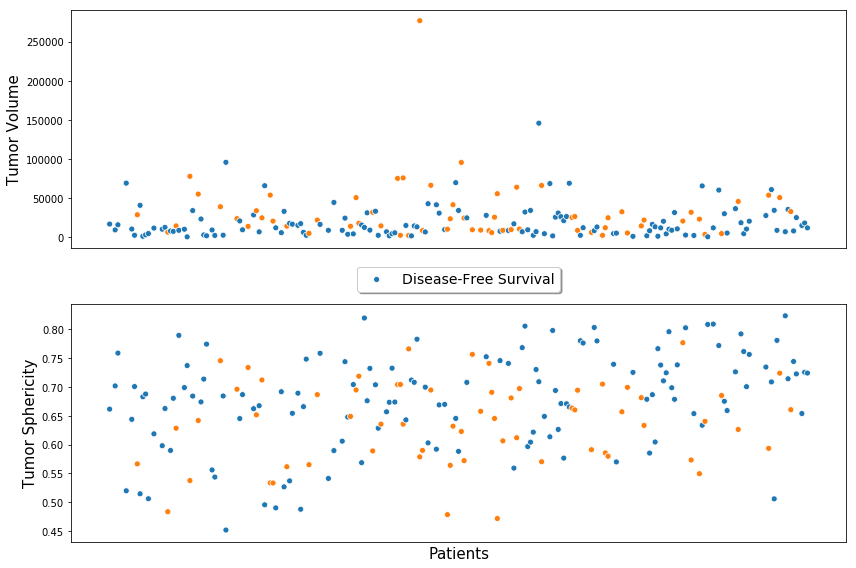

In [17]:
from matplotlib import rcParams, cycler

#colours = sns.diverging_palette(255, 133, l=60, n=195, center="dark")
#rcParams['axes.prop_cycle'] = cycler(color=colours)

fig, axes = plt.subplots(
    nrows=2, 
    figsize=(12, 8), 
    sharex=True
)
# Tumor volume.
sns.scatterplot(
    x=patient_ids, 
    y='original_shape_Volume', 
    data=X,
    hue=y, 
    ax=axes[0], 
    legend=False,
)
axes[0].set_ylabel('Tumor Volume', fontsize=15)

# Tumor spherity.
sns.scatterplot(
    x=patient_ids, 
    y='original_shape_Sphericity',
    data=X,
    hue=y, 
    ax=axes[1], 
    legend=False
)
axes[1].set_ylabel('Tumor Sphericity', fontsize=15)
axes[1].set_xlabel('Patients', fontsize=15)
axes[1].set_xticks([])

axes[0].legend(
    ['Disease-Free Survival'],
    fontsize=14,
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.05),
    fancybox=True, 
    shadow=True, 
)
plt.tight_layout()
plt.savefig(
    './../../../figures/tumor_characteristics.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

# Radiomic Feature Scatterplots

In [14]:
X_shape = X.filter(regex='shape')

X_CT_firstorder = X.filter(regex='CT_original_firstorder')
X_PET_firstorder = X.filter(regex='PET_original_firstorder')

to_keep = [
    col for col in X.columns 
    if col not in pd.concat((X_shape, X_CT_firstorder, X_PET_firstorder), axis=1).columns
]
X_CT_texture = X.loc[:, to_keep].filter(regex='CT')
X_PET_texture = X.loc[:, to_keep].filter(regex='PET')

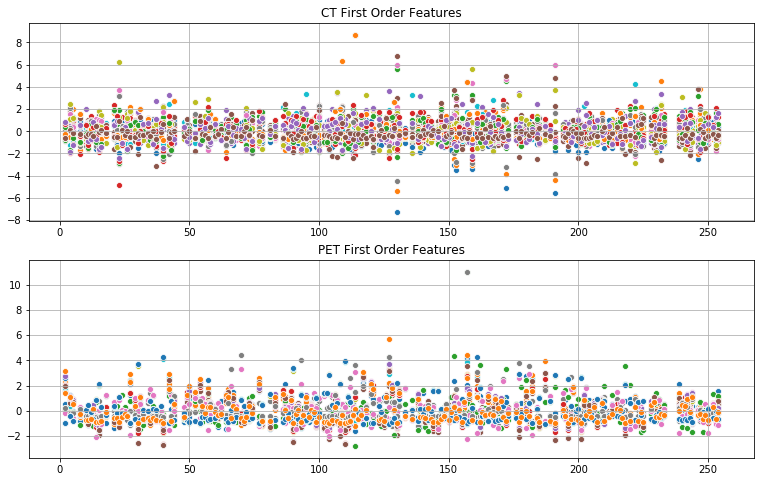

In [15]:
scaler = StandardScaler()
X_CT_firstorder_std = scaler.fit_transform(X_CT_firstorder)
fig, axes = plt.subplots(
    nrows=2, figsize=(13, 8)
)
for num, _ in enumerate(X_CT_firstorder):
    sns.scatterplot(
        patient_ids,
        X_CT_firstorder_std[:, num],
        ax=axes[0]
    )
axes[0].set_title('CT First Order Features')
axes[0].grid()

scaler = StandardScaler()
X_PET_firstorder_std = scaler.fit_transform(X_PET_firstorder)
for num, _ in enumerate(X_PET_firstorder):
    sns.scatterplot(
        patient_ids,
        X_PET_firstorder_std[:, num],
        ax=axes[1]
    )
axes[1].set_title('PET First Order Features')
axes[1].grid()

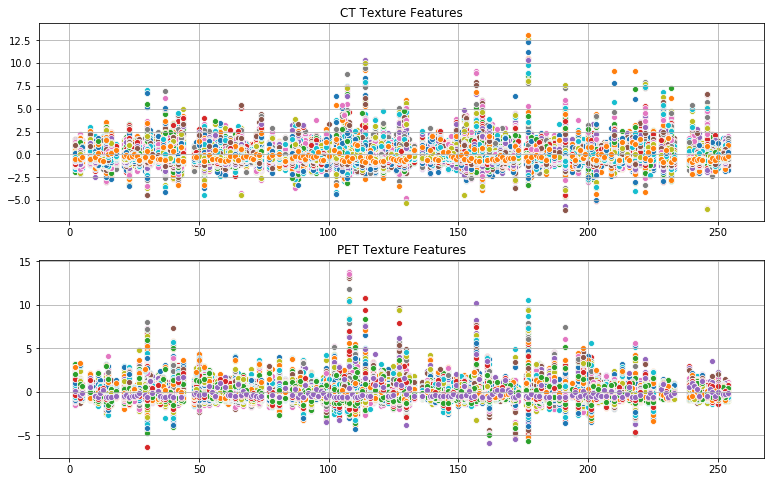

In [16]:
fig, axes = plt.subplots(
    nrows=2, figsize=(13, 8)
)
scaler = StandardScaler()
X_CT_texture_std = scaler.fit_transform(X_CT_texture)
for num, _ in enumerate(X_CT_texture):
    sns.scatterplot(
        patient_ids,
        X_CT_texture_std[:, num],
        ax=axes[0]
    )
axes[0].set_title('CT Texture Features')
axes[0].grid()

scaler = StandardScaler()
X_PET_texture_std = scaler.fit_transform(X_PET_texture)
for num, _ in enumerate(X_PET_texture):
    sns.scatterplot(
        patient_ids,
        X_PET_texture_std[:, num],
        ax=axes[1]
    )
axes[1].set_title('PET Texture Features')
axes[1].grid()

In [ ]:
# Intention Hassan transform: Render feature independent of gray level discretization.

In [ ]:
# References to disk locations.
raw_source = './../../../data_source/radiomic_features/no_filter/'
prep_source = './../../../data_source/to_analysis/no_filter/'

# Target feature category.
target_class = 'original'

error_dir = './../../../data_source/radiomic_features/no_filter/errors/'

# Individual file names.
ct_labels = [
    'ct_no_filter30.csv',
    'ct_no_filter50.csv',
    'ct_no_filter70.csv',
    'ct_no_filter90.csv',
    'ct_no_filter110.csv',
    'ct_no_filter130.csv'
]
pet_labels = [
    'pet_no_filter30.csv',
    'pet_no_filter50.csv',
    'pet_no_filter70.csv',
    'pet_no_filter90.csv',
    'pet_no_filter110.csv',
    'pet_no_filter130.csv'
]

# Analyzing raw features. Filter out redundant columns.
ct_data, pet_data = [], []
for ct_label, pet_label in zip(ct_labels, pet_labels):
    
    ct_path = os.path.join(raw_source, ct_label)
    pet_path = os.path.join(raw_source, pet_label)

    ct_data.append(
        pd.read_csv(ct_path, index_col=3).filter(regex=target_class)
    )
    pet_data.append(
        pd.read_csv(pet_path, index_col=3).filter(regex=target_class)
    )

In [ ]:
dfs = pd.read_csv('./../../../data_source/to_analysis/target_dfs.csv', index_col=0) 
lrr = pd.read_csv('./../../../data_source/to_analysis/target_lrr.csv', index_col=0)

In [ ]:
# Globals
SEED = 0
THRESH = 1e-8
FONTSIZE = 14
PATIENT_ID = np.load('./../../../data_source/patient_id.npy')

In [ ]:
hassan_transforms = {
    # Nv: Number of voxels in ROI.
    'firstorder_Entropy': lambda f, Nv: f * np.log(Nv), 
    # Ng: Numer of gray levels in image.
    'glcm_DifferenceEntropy': lambda f, Ng: f / np.log(Ng ** 2),
    'glcm_JointEntropy': lambda f, Ng: f / np.log(Ng ** 2),
    'glcm_SumEntropy': lambda f, Ng: f / np.log(Ng ** 2),
    'glcm_Contrast': lambda f, Ng: f / (Ng ** 2),
    'glcm_DifferenceVariance': lambda f, Ng: f / (Ng ** 2),
    'glcm_SumAverage': lambda f, Ng: f / Ng,
    'glcm_DifferenceAverage': lambda f, Ng: f / Ng, 
    # Ng: Numer of gray levels in image.
    'glrlm_GrayLevelNonUniformity': lambda f, Ng: f * Ng,
    'glrlm_HighGrayLevelRunEmphasis': lambda f, Ng: f / (Ng ** 2),
    'glrlm_ShortRunHighGrayLevelEmphasis': lambda f, Ng: f / (Ng ** 2),
    # Ng: Numer of gray levels in image.
    'ngtdm_Contrast': lambda f, Ng: f / Ng,
    'ngtdm_Complexity': lambda f, Ng: f / (Ng ** 3),
    'ngtdm_Strength': lambda f, Ng: f / (Ng ** 2),
     
}
# Gray level discretisations.
discr_levels = [
    '30',
    '50',
    '70',
    '90',
    '110',
    '130'
]

In [ ]:
source_hassan = './../../../data_source/to_analysis/no_filter_hassan/'
source_orig = './../../../data_source/to_analysis/no_filter/'

# Individual file names.
ct_labels = [
    'ct_no_filter30.csv',
    'ct_no_filter50.csv',
    'ct_no_filter70.csv',
    'ct_no_filter90.csv',
    'ct_no_filter110.csv',
    'ct_no_filter130.csv'
]
pet_labels = [
    'pet_no_filter30.csv',
    'pet_no_filter50.csv',
    'pet_no_filter70.csv',
    'pet_no_filter90.csv',
    'pet_no_filter110.csv',
    'pet_no_filter130.csv'
]

In [ ]:
ct_concat_orig = pd.read_csv('./../../../data_source/to_analysis/ct_no_filter_concat.csv', index_col=0)
pet_concat_orig = pd.read_csv('./../../../data_source/to_analysis/pet_no_filter_concat.csv', index_col=0)

ct_concat_hassan = pd.read_csv('./../../../data_source/to_analysis/ct_no_filter_hassan_concat.csv', index_col=0)
pet_concat_hassan = pd.read_csv('./../../../data_source/to_analysis/pet_no_filter_hassan_concat.csv', index_col=0)

In [ ]:
ct_concat_orig.shape, pet_concat_orig.shape, ct_concat_hassan.shape, pet_concat_hassan.shape

In [ ]:
ct_feats = [
    pd.read_csv(os.path.join(source_orig, path_ct), index_col=0) for path_ct in ct_labels
]
pet_feats = [
    pd.read_csv(os.path.join(source_orig, path_pet), index_col=0) for path_pet in pet_labels
]

In [ ]:
ct_feats_hass = [
    pd.read_csv(os.path.join(source_hassan, 'hassan_{}'.format(path_ct)), index_col=0) for path_ct in ct_labels
]
pet_feats_hass = [
    pd.read_csv(os.path.join(source_hassan, 'hassan_{}'.format(path_pet)), index_col=0) for path_pet in pet_labels
]

In [ ]:
def get_feature_labels(columns):
    
    return [('_').join(col.split('_')[1:]) for col in columns]

In [ ]:
# Check which original (no Hassan transform) CT features are affected by varying gray levels.

# Extract labels for grouping features.
ct_feat_lbls = get_feature_labels(ct_feats[0].columns.values)
pet_feat_lbls = get_feature_labels(pet_feats[0].columns.values)

ct_aff = {}
for lbl in ct_feat_lbls:
    sample_var = sum(ct_concat_orig.filter(regex=lbl).var(axis=1))
    if sample_var > THRESH:
        ct_aff[lbl] = sample_var    
    
pet_aff = {}
for lbl in pet_feat_lbls:
    sample_var = sum(pet_concat_orig.filter(regex=lbl).var(axis=1))
    if sample_var > THRESH:
        pet_aff[lbl] = sample_var

In [ ]:
# The CT features varying > THRESH across gray level discretizations.
len(ct_aff)

In [ ]:
# The PET features varying > THRESH across gray level discretizations.
len(pet_aff)

In [ ]:
# Compare with after Hassan transform (currently only applied to CT images).
ct_aff = {}
for lbl in ct_feat_lbls:
    sample_var = sum(ct_concat_hassan.filter(regex=lbl).var(axis=1))
    if sample_var > THRESH:
        ct_aff[lbl] = sample_var    
        
len(ct_aff), len(hassan_transforms.keys())

# COMMENTS:
# * All CT features are now varying across gray level discretizations.
# * Is the idea with the Hassan transform to individualize features across gray level
#   discretisation settings, or render features unaffected by varying gray levels?

In [ ]:
# Filter out all columns not among the CT transformed features.
transf_feats = []
for num, dset in enumerate(ct_feats_hass):
    _transf_feats = []
    idx_labels = []
    for key in hassan_transforms.keys():
        target_feat = dset.filter(regex=key).columns.values

        # TEMP: Hack to remove add GLNUM when searching for GLNU.
        if len(target_feat) > 1:
            target_feat = target_feat[0]

        if len(target_feat) == 1:
            idx_labels.append(target_feat)
            _transf_feats.append(dset[target_feat])

    transf_feats.append(pd.concat(_transf_feats, axis=1)) 

In [ ]:
# Calculate statistics for each remaining feature.
transf_stats = []
for dset in transf_feats:
    scaler = StandardScaler()
    X = pd.DataFrame(
        scaler.fit_transform(dset.values),
        columns=dset.columns, index=dset.index
    )
    df = pd.DataFrame(
        {
            'Average': np.mean(X),
            'Median': np.median(X),
            'Min': np.min(X),
            'Max': np.max(X),
        },
    )
    transf_stats.append(df)
    
for dset in transf_stats:
    dset.index = np.squeeze(idx_labels)

In [ ]:
# Will modifying feature definitions (Hassan) render all modified features identical 
# across feature sets?
#
# Plot Z-score transformed features rendering features on comparable scales. 
colours = ['b', 'y', 'r', 'g', 'm', 'c']

fig, axes = plt.subplots(nrows=6)
for num, axis in enumerate(axes):
    data = transf_stats[num]
    print(data.shape)
    #for col in dset:
    #    data = dset[col]
    #    plt.scatter(np.squeeze(idx_labels), data, marker='o')#, c=colours[num], marker='o')
        #plt.plot(data, marker='o') 
    #    plt.yticks(range(6), discr_levels)

## Raw Radiomics Features

In [ ]:
# Sanity check on number of extracted features.
for ct_dset, pet_dset in zip(ct_data, pet_data):
    print(np.shape(ct_dset), np.shape(pet_dset))

### Features Affected by Gray Level Discretization

In [ ]:
# Check which CT features are affected by varying gray levels.
ct_feats = ct_data[0].columns.values
pet_feats = pet_data[0].columns.values

ct_concat = pd.concat(ct_data, axis=1)
pet_concat = pd.concat(pet_data, axis=1)

np.shape(ct_concat), np.shape(pet_concat)

ct_aff = {}
for ct_feat in ct_feats:
    sample_var = sum(ct_concat.filter(regex=ct_feat).var(axis=1))
    if sample_var > THRESH:
        ct_aff[ct_feat] = sample_var    
        
pet_aff = {}
for pet_feat in pet_feats:
    sample_var = sum(pet_concat.filter(regex=pet_feat).var(axis=1))
    if sample_var > THRESH:
        pet_aff[pet_feat] = sample_var

In [ ]:
ct_aff

In [ ]:
pet_aff

## Clinical Variables

In [ ]:
clinical = pd.read_excel(
    './../../../data_source/tabular/clinical_params.xlsx',
    index_col=0
)
clinical.columns = [
    'Age', 'Sex', 'ICD-10', 'T-Stage', 'N-Stage', 'Overall Stage', 'Histology', 'HPV', 
    'ECOG', 'Charlson', 'Pack-year', 'Naxogin', 'Cisplatin'
]
clinical.head()

In [ ]:
clinical.describe()

In [ ]:
# TODO: Consider Blue and green Cmap.


## Radiomics Features for Analysis

In [ ]:
X = pd.read_csv('./../../../data_source/to_analysis/complete.csv', index_col=0)
X.head()

In [ ]:
X.filter(regex='shape').columns

In [ ]:
sphericity = X.loc[:, 'original_shape_Sphericity'].values
surface_area = X.loc[:, 'original_shape_SurfaceArea'].values
volume = X.loc[:, 'original_shape_Volume'].values
min(volume), max(volume), min(surface_area), max(surface_area)

In [ ]:
# NOTE: Shape features are calculated from the mask image (same for both CT and PET).
sns.set()
fig, axes = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)

vals = X.loc[:, 'original_shape_Volume'].values
sns.scatterplot(
    x=range(198), y=vals, 
    hue=PATIENT_ID, ax=axes[0], 
)
axes[0].set_ylabel('Volume', fontsize=FONTSIZE)

vals = X.loc[:, 'original_shape_SurfaceArea'].values
sns.scatterplot(
    x=range(198), y=vals, 
    hue=PATIENT_ID, ax=axes[1], legend=False
)

vals = X.loc[:, 'original_shape_Sphericity'].values
axes[1].set_ylabel('Surface Area', fontsize=FONTSIZE)
sns.scatterplot(
    x=range(198), y=vals, 
    hue=PATIENT_ID, ax=axes[2], legend=False
)
axes[2].set_ylabel('Sphericity', fontsize=FONTSIZE)
axes[2].set_xlabel('Patients', fontsize=FONTSIZE)
axes[2].set_xticks([])

plt.tight_layout()
plt.savefig(
    './../../../figures/tumor_char.png', 
    bbox_inches='tight',
    transparent=True,
    dpi=400, 
)

In [ ]:
PATIENT_ID.size

In [ ]:
X.filter(regex='firstorder').columns.values

In [ ]:
# NOTE: Shape features are calculated from the mask image (same for both CT and PET).


In [ ]:
X.loc[:, 'original_shape_SurfaceArea'].shape

In [ ]:
sns.relplot(
    x='original_shape_Volume', y='original_shape_SurfaceArea', 
    hue=PATIENT_ID, palette="ch:r=-.5,l=.75", data=X, legend=False
);

In [ ]:
ct_features =  X.filter(regex='CT')
pet_features =  X.filter(regex='PET')
shape_features =  X.filter(regex='CT')

In [ ]:
g = sns.FacetGrid(ct_features, margin_titles=True);
g.map(sns.regplot, ct_features.columns[1], ct_features.columns[2]);

## Decorrelated Features

In [ ]:
decorr = pd.read_csv('./../../data/to_analysis/complete_decorr.csv', index_col=0)
decorr.head()

In [ ]:
X = decorr.copy()

In [ ]:
plt.figure(figsize=(6, 6))
sns.regplot(x='forward_corr', y='backward_corr', data=X);

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 8))
sns.regplot(x=X['forward_corr'], y=np.squeeze(dfs.values), ax=axes[0]);
sns.regplot(x=X['backward_corr'], y=np.squeeze(dfs.values), ax=axes[1]);

# Subspace Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
complete_decorr = pd.read_csv('./../../data/to_analysis/complete_decorr.csv', index_col=0)
clinical = pd.read_csv('./../../data/to_analysis/clinical_params.csv', index_col=0)
radiom = pd.read_csv('./../../data/to_analysis/img_features.csv', index_col=0)

In [ ]:
# 
X = complete_decorr

# Standardize prior to PCA.
scaler = StandardScaler()
X_std = scaler.fit_transform(X.values)

pca_model = PCA(n_components=X.shape[1])
pca_model.fit(X_std)

# Number of components for >= 0.99 variance.
target_n_comps = X.shape[1] - sum(np.cumsum(pca_model.explained_variance_ratio_) >= 0.99)

tick_range = np.arange(1, X.shape[1] + 1, 5)
# Information (variance) attributed to each PC
plt.figure(figsize=(10, 6))
plt.plot(
    np.cumsum(pca_model.explained_variance_ratio_)
);
plt.xlabel('Principal Component', fontsize=15);
plt.ylabel('Explained Variance Ratio', fontsize=16);
plt.xticks(tick_range, tick_range)
plt.yticks(fontsize=14); plt.xticks(fontsize=14);
plt.axvline(x=target_n_comps, c='m')
plt.xlim([0, 87])
plt.grid()

In [ ]:
X = clinical

# Standardize prior to PCA.
scaler = StandardScaler()
X_std = scaler.fit_transform(X.values)

pca_model = PCA(n_components=X.shape[1])
pca_model.fit(X_std)

# Number of components for >= 0.99 variance.
target_n_comps = X.shape[1] - sum(np.cumsum(pca_model.explained_variance_ratio_) >= 0.99)

tick_range = np.arange(1, X.shape[1] + 1, 5)
# Information (variance) attributed to each PC
plt.figure(figsize=(10, 6))
plt.plot(
    np.cumsum(pca_model.explained_variance_ratio_)
);
plt.xlabel('Principal Component', fontsize=15);
plt.ylabel('Explained Variance Ratio', fontsize=16);
plt.xticks(tick_range, tick_range)
plt.yticks(fontsize=14); plt.xticks(fontsize=14);
plt.axvline(x=target_n_comps, c='m')
plt.xlim([0, 87])
plt.grid()

In [ ]:
X = radiom

# Standardize prior to PCA.
scaler = StandardScaler()
X_std = scaler.fit_transform(X.values)

pca_model = PCA(n_components=X.shape[1])
pca_model.fit(X_std)

# Number of components for >= 0.99 variance.
target_n_comps = X_std.shape[1] - sum(np.cumsum(pca_model.explained_variance_ratio_) >= 0.99)

tick_range = np.arange(1, X_std.shape[1] + 1, 5)
# Information (variance) attributed to each PC
plt.figure(figsize=(10, 6))
plt.plot(
    np.cumsum(pca_model.explained_variance_ratio_)
);
plt.xlabel('Principal Component', fontsize=15);
plt.ylabel('Explained Variance Ratio', fontsize=16);
plt.xticks(tick_range, tick_range)
plt.yticks(fontsize=14); plt.xticks(fontsize=14);
plt.axvline(x=target_n_comps, c='m')
plt.xlim([0, 87])
plt.grid()

# Clustering Analysis

In [ ]:
complete_decorr = pd.read_csv('./../../data/to_analysis/complete_decorr.csv', index_col=0)
clinical = pd.read_csv('./../../data/to_analysis/clinical_params.csv', index_col=0)
radiom = pd.read_csv('./../../data/to_analysis/img_features.csv', index_col=0)

## Consensus clustering

In [ ]:
from sklearn.cluster import bicluster

### Spectral Coclustering

In [ ]:
# Complete decorrelated data.
bic_model = bicluster.SpectralCoclustering(n_clusters=4)
bic_model.fit(complete_decorr)

data = complete_decorr.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

In [ ]:
# Clinical data.
bic_model = bicluster.SpectralCoclustering(n_clusters=4)
bic_model.fit(clinical)

data = clinical.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

In [ ]:
# Radiomics data.
bic_model = bicluster.SpectralCoclustering(n_clusters=9)
bic_model.fit(radiom)

data = radiom.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

### Spectral Biclustering

In [ ]:
# Complete decorrelated data.
bic_model = bicluster.SpectralBiclustering(n_clusters=4)
bic_model.fit(complete_decorr)

data = complete_decorr.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

In [ ]:
# Clinical data.
bic_model = bicluster.SpectralBiclustering(n_clusters=4)
bic_model.fit(clinical)

data = clinical.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

In [ ]:
# Radiomics data.
bic_model = bicluster.SpectralBiclustering(n_clusters=4)
bic_model.fit(radiom)

data = radiom.values
fit_data = data[np.argsort(bic_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bic_model.column_labels_)]

plt.figure()
sns.heatmap(
    np.outer(
        np.sort(bic_model.row_labels_) + 1, np.sort(bic_model.column_labels_) + 1
    ),
    cmap=plt.cm.Blues
)
plt.axis('off')
plt.tight_layout()

## Density Based Scan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
complete_decorr_std = StandardScaler().fit_transform(complete_decorr)
clinical_std = StandardScaler().fit_transform(clinical)
radiom_std = StandardScaler().fit_transform(radiom)

In [ ]:
# Complete decorrelated data.
X = complete_decorr_std

dbscan = DBSCAN(eps=0.01, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    # Black used for noise.
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = complete_decorr_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

In [ ]:
# Clinical data.
X = clinical_std

dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    # Black used for noise.
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = complete_decorr_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

In [ ]:
# Radiomics data.
X = radiom_std

dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    # Black used for noise.
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = complete_decorr_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

## K-Means 

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [ ]:
# Complete decorrelated data.
X = complete_decorr_std

n_clusters = 2

clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)